<a href="https://colab.research.google.com/github/JonathanLooman/Fashion_MNIST_Pytorch/blob/main/JonathanLoomanFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data modeling of Fashion MNIST
By: Jonathan Looman \\
The project is split up as follows: \\
1) References \\
2) Importing packages and Data and check for uniform distribution \\
3) Model construction code \\
4) Train and Validate Model code \\
5) Analysis excecution






## Stage 1: References

[1] Pytorch documentation <br>
[2] DeepLizard Neural Network Deeplearning with Pytorch video series, avaliable at: https://www.youtube.com/watch?v=v5cngxo4mIg&list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG&ab_channel=deeplizard <br>
[3] Convolutional Neural Networks Tutorial in PyTorch by adam, available at: https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/ <br>
[4] stack overflow article on splitting training dataloader for validation, avalilabe at: https://stackoverflow.com/questions/50207001/pytorch-add-validation-error-in-training

## Stage 1: Import and prepare data
1.1) Import packages \\
1.1) Build data loader and retreve data from Torchvision \\
1.2) Inspect data distribution between classes


In [ ]:
# 1.1) Import requisit packages

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Torchvision was used to load the dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# matplotlib and numpy were used to plot the graph only
import matplotlib.pyplot as plt
import numpy as np


torch.set_printoptions(linewidth = 120)
torch.set_grad_enabled(True)

In [ ]:
#1.2) Build data loader and retreve data from Torchvision [2]
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download=True,#download if not already on disk
    transform = transforms.Compose([transforms.ToTensor()
                                    ])#transform data into tensors
)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 64, shuffle=True)

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#1.2) Build data loader and retreve data from Torchvision [2]
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download=True,#download if not already on disk
    transform = transforms.Compose([transforms.ToTensor()
                                    ])#transform data into tensors
)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size = 64)

In [ ]:
#1.3) Inspect data distribution between classes
train_set.train_labels.bincount()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
#1.4) Split into training and validation datasets
val_split = 0.2

dataset_len = len(train_set)
indices = list(range(dataset_len))

In [ ]:
# Randomly splitting indices: [4]
val_len = int(np.floor(val_split * dataset_len))
validation_idx = np.random.choice(indices, size=val_len, replace=False)
train_idx = list(set(indices) - set(validation_idx))


In [ ]:
train_sampler = SubsetRandomSampler(train_idx) #[4]
validation_sampler = SubsetRandomSampler(validation_idx)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, sampler=train_sampler, num_workers = 2)
validation_loader = torch.utils.data.DataLoader(train_set,batch_size = 64, sampler=validation_sampler, num_workers = 2)
#[4]

## Stage 2: Building the Convolutional Neural Network


In [ ]:
class Network(nn.Module):
  '''
  Network class holds initialisation function as well as the forward function.
  To simplify the code, only layers will be initialised and layer operations
  (activation functions and pooling operations) are moved to the 
  forward function.

  args: nn.Module to extend the pytorch module.

  return: None

  reference: [2]
  '''
  def __init__(self ):
      '''

      '''
      super().__init__()
      self.conv1 = nn.Conv2d(
          in_channels=1, 
          out_channels=16, 
          kernel_size=(3,3)
          )
      
      self.conv2 = nn.Conv2d(
          in_channels=16,
           out_channels=32,
            kernel_size=(3,3)
            )
      
      #Due to pooling the 28 by 28 gray scale image is now effectively 14 by 14
      self.fc1 = nn.Linear(in_features=32 * 12 * 12, out_features=128)
      self.out = nn.Linear(in_features=128, out_features=10)
  
  
  def forward(self, arg, drop_out_p):
      arg = arg
      # first hidden conv layer
      arg1 = self.conv1(arg)
      arg1 = F.relu(arg1)
        

      # second hidden conv layer
      arg1 = self.conv2(arg1)
      arg1 = F.relu(arg1)
      arg1 = F.max_pool2d(arg1, 
                          kernel_size=(2,2), 
                          stride=2)
                          #stride moves the image by two and effectively 
                          #downsamples by 2

      # first fully connected layer 
      arg1 = arg1.reshape(-1,32 *12*12)# -1 allows the input of any size batch 
      arg1 = self.fc1(arg1)
      arg1 = F.relu(arg1)
      arg1 = F.dropout(arg1, p=drop_out_p)

      # output layer
      arg1 = self.out(arg1)
      arg1 = F.softmax(arg1, dim=1)

      return arg1


## Stage 3: Train and Validate Model

In [ ]:
# initialising logger
import logging
# Create and configure logger
LOG_FORMAT = "%(message)s"
logging.basicConfig(filename = 
                    "Training_loss_ and_val_accuracy_loss.log",
                    level = logging.DEBUG,
                    format = LOG_FORMAT,
                    filemode = 'a'
                    )
logger = logging.getLogger()

In [ ]:
def train_network(drop_out_p = 0.2):
  '''
  Method to train and validate the model 
  '''
  torch.set_grad_enabled(True)
  accuracy_list, loss_list = [], []

  
  network = Network().cuda() #Move network to GPU

  #train_loader = torch.utils.data.DataLoader(train_set, batch_size=68)
  optimizer = optim.Adam(network.parameters(), lr=0.01) 

  for epoch in range(10):
    total_loss = 0
    total_correct = 0

    for images, labels in train_loader: # Get Batch
        images, labels = images.cuda(), labels.cuda()
        
        preds = network(images, drop_out_p) # Pass data and the dropout_price
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += preds.argmax(dim=1).eq(labels).sum()

      
    percentage_correct = (total_correct.true_divide(len(train_set)*0.8)).item()
    
    accuracy_list.append(percentage_correct)
    loss_list.append(total_loss)
    
    validation_loss, validation_accuracy = validate_network(network, drop_out_p)
    logger.info(f"Dropout rate {drop_out_p} Epoch: {epoch} ")
    logger.info(f"Training Loss {loss_list}")
    logger.info(f"Validation Accuracy {validation_accuracy} ")
    logger.info(f"validation loss {validation_loss}")
    
  return loss_list, validation_loss, validation_accuracy, network


In [ ]:
def validate_network(network, drop_out_p):
  network.eval()
  torch.set_grad_enabled(True)
  total_correct_val = 0
  total_loss_val = 0
  for images, labels in validation_loader:
    images, labels = images.cuda(), labels.cuda()
    predictions = network(images,drop_out_p = 0.2)
    loss = F.cross_entropy(predictions, labels)
    total_loss_val += loss.item()
    total_correct_val += predictions.argmax(dim=1).eq(labels).sum()
  return total_loss_val, total_correct_val.true_divide(len(train_set)*0.2).item()

## Stage 4: Performing analysis

In [ ]:
def Test_network(network, drop_out_p):
  '''
  Makes predictions of the class and returns the per cent 
  of correct predictions
  '''
  network.eval()
  torch.set_grad_enabled(True)
  total_correct_test = 0
  total_loss_test = 0
  for images, labels in test_loader:
    images, labels = images.cuda(), labels.cuda()
    predictions = network(images,drop_out_p = drop_out_p)
    loss = F.cross_entropy(predictions, labels)
    total_loss_test += loss.item()
    total_correct_test += predictions.argmax(dim=1).eq(labels).sum()
  return total_correct_test.true_divide(len(test_set)).item()

In [ ]:
def Analysis(list_of_dropout_p):
  '''
  This method returns the list of dropout rates and
  a list of their accuracy when tested on the testing set.
  '''
  
  list_of_results = []
  
  for dropout_p in list_of_dropout_p:
    loss_list, validation_loss, validation_accuracy, network = train_network(
        drop_out_p = dropout_p)

  
    list_of_results.append((Test_network(
        network = network, drop_out_p = dropout_p)))
    
  return list_of_dropout_p, list_of_results


In [ ]:
def predict5(test_set, best_net): 
  '''
  This method will load five random clothing items from the test dataset
  and make predictions of which item of clothing it is.
  '''
  
  
  
  
  clothing_dict = {0:'T-shirt/top',
                 1:'Trouser',
                 2:'Pullover',
                 3:'Dress',
                 4:'Coat',
                 5:'Sandal',
                 6:'Shirt',
                 7:'Sneaker',
                 8:'Bag',
                 9:'Ankle boot'
                 }
  random_test_loader = torch.utils.data.DataLoader(
      test_set, batch_size = 5, shuffle=True)
  batch = next(iter(random_test_loader))
  images, labels = batch
  plt.figure(figsize = (15,15))
  grid = torchvision.utils.make_grid(images, nrow=15)
  plt.imshow(np.transpose(grid, (1,2,0)))
  images, labels = images.cuda(), labels.cuda()
  best_net.eval()
  torch.set_grad_enabled(False)
  preds = best_net(images, drop_out_p = 0.0)

  
  true_class, pred_class = [], []
  
  for l in labels:
    true_class.append(clothing_dict[l.item()])
  for p in preds.argmax(dim=1):
    pred_class.append(clothing_dict[p.item()])
  print('labels:      ', true_class)
  print('predictions: ',pred_class
        )

# Stage 4: Run Analysis
Choices:
Adam optimiser and cross entropy loss function were used as they have perviously worked well in the past.

Best Dropout:  0.5
Dropout Rates


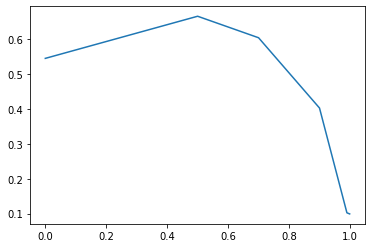

labels:       ['Trouser', 'Shirt', 'Dress', 'Coat', 'Trouser']
predictions:  ['Trouser', 'Pullover', 'Dress', 'Pullover', 'Trouser']


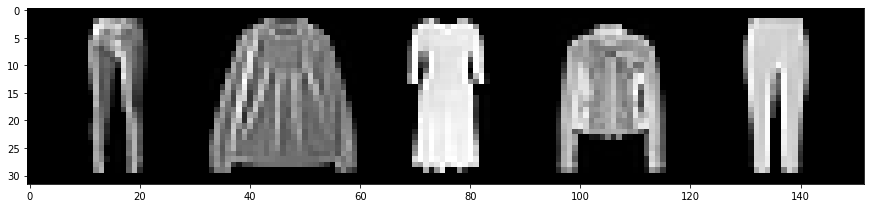

In [ ]:
list_of_dropout_p = [0.0, 0.5, 0.7, 0.9, 0.99, 0.999]
list_of_dropout_p, list_of_results = Analysis(list_of_dropout_p)
print('Best Dropout: ', list_of_dropout_p[np.argmax(list_of_results)])
print('Dropout Rates')
plt.plot(list_of_dropout_p, list_of_results)
plt.show()
#training network with best dropout rate
loss_list, validation_loss, validation_accuracy, network = train_network(
    drop_out_p = list_of_dropout_p[np.argmax(list_of_results)])

predict5(test_set, network)